# Introducción a la librería miniSOM

## Cargamos librerías
Si no tenemos instalada la librería minisom, este es el momento de instalarla.

In [83]:
from minisom import MiniSom
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Cargamos los datos
Este dataset cuenta con un número determinado de variables. La variable objetivo (esto está pensado para un problema de clasificación) es la variable diagnosis. Esta variable tiene dos valores posibles, "M" (maligno) y "B" (benigno). 

Vamos a utilizar este dataset en los ejemplos.

In [84]:
data = pd.read_csv("cancer.csv")
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [85]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

Vamos ahora a crearnos una variable numérica que represente cada uno de estos valores de la variable objetivo.

In [86]:
data["diagnosis"] = pd.Categorical(data["diagnosis"])

In [87]:
data["codes_diagnosis"] = data["diagnosis"].cat.codes

In [88]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  codes_diagnosis  
0                  0.11890                1  
1                  0.08902                1  
2                  0.08758                1  
3                  0.17300                1  
4                  0.07678                1  

[5 rows x 33 columns]

In [89]:
data.codes_diagnosis.unique()

array([1, 0], dtype=int8)

In [91]:
X = data.drop(["diagnosis", "codes_diagnosis"], axis = 1)
y = data[["codes_diagnosis"]].values
label_names = data["diagnosis"].unique()

## Normalizamos los datos con media 0 y desviación típica 1.

In [92]:
scaler = StandardScaler()

In [93]:
X_norm = X.copy()

In [94]:
X_norm = scaler.fit_transform(X_norm)

## Ejemplo 1

Este código está usando la biblioteca MiniSom para crear y entrenar un mapa autoorganizado (SOM, por sus siglas en inglés) con los datos de entrada. Un SOM es una técnica de aprendizaje no supervisado que se utiliza para visualizar datos de alta dimensión en un espacio de menor dimensión, usualmente 2D o 3D, conservando la estructura topológica de los datos de entrada. 

Cada punto de datos se representa con un marcador en la posición exacta de su neurona ganadora.

En detalle:

Se usa plt.pcolor(som.distance_map().T, cmap='bone_r') para trazar el mapa de distancias del SOM como fondo del gráfico. Al igual que en el código anterior, las áreas más oscuras del mapa representan transiciones más grandes entre los grupos de datos.

Se define una lista de marcadores y colores para representar las diferentes clases en los datos. Por ejemplo, 'o', 's' son diferentes formas de marcadores y 'C0', 'C1' son diferentes colores.

Para cada dato en el conjunto de datos, se obtiene la neurona ganadora en el SOM, es decir, la neurona cuyo vector de pesos es más similar al dato.

Se coloca un marcador en la posición de la neurona ganadora para ese dato. El marcador no tiene color de relleno (markerfacecolor='None'), el color del borde del marcador está determinado por la clase del dato (markeredgecolor=colors[target[cnt]-1]), y se ajusta el tamaño y el ancho del borde del marcador.

In [95]:
som = MiniSom(6, 6, X_norm.shape[1], sigma=0.3, learning_rate=0.5) # Inicializamos un mapa de 6x6 neuronas y X_norm.shape[1] features
som.train(X_norm, 100) # entrenamos el SOM con 100 iteraciones

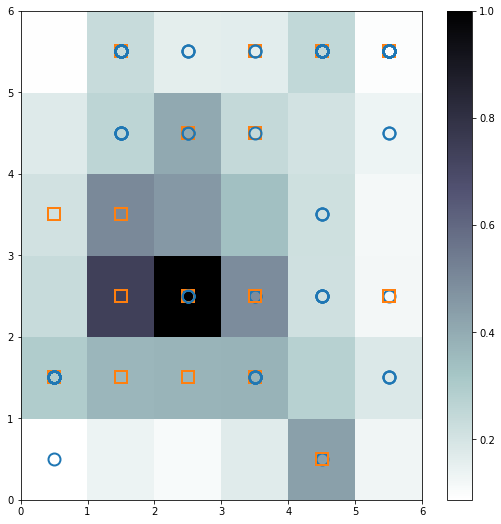

In [96]:
plt.figure(figsize=(9, 9))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Plotting the response for each pattern in the iris dataset
# different colors and markers for each label
markers = ['o', 's']
colors = ['C0', 'C1']
for cnt, xx in enumerate(X_norm):
    w = som.winner(xx)  # getting the winner
    idx = int(y[cnt])
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[idx], markerfacecolor='None',
             markeredgecolor=colors[idx], markersize=12, markeredgewidth=2)
    

plt.show()

Se obtiene una representación más precisa de cuántos y cuáles datos están siendo mapeados a cada neurona, gracias a que los marcadores están exactamente en la posición de las neuronas ganadoras. Así, se puede ver claramente cómo los diferentes grupos (clases) de datos están distribuidos en el espacio de las características y cuántos datos de cada clase se mapean a cada neurona.

## Ejemplo 2

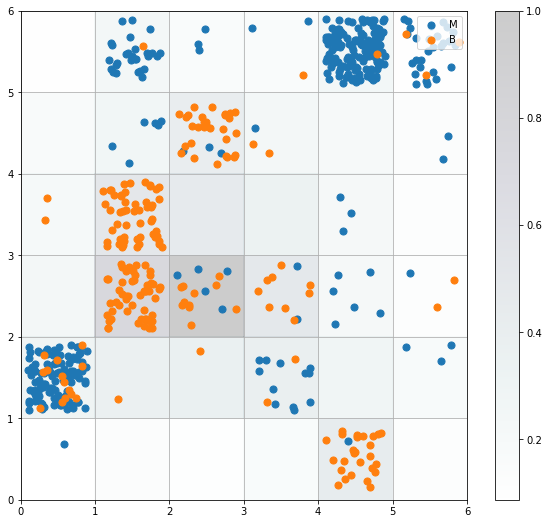

In [128]:
w_x, w_y = zip(*[som.winner(d) for d in X_norm])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()
colors = ["C1", "C0"]

for c in np.unique(y):
    idx_target = y.ravel() == c # y.ravel() aplana y a una dimensión
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], 
                label=label_names[c])
plt.legend(loc='upper right')
plt.grid()
plt.show()

En este gráfico, cada neurona en la cuadrícula representa un grupo o 'cluster' de datos similares. La posición de cada neurona en la cuadrícula se decide durante el entrenamiento del SOM y los datos similares tienden a agruparse juntos.

Vamos a repasar las partes más importantes del código:

plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2): Este comando genera el 'mapa de distancia' del SOM, que es una representación visual de cuán diferentes son las neuronas entre sí. Los colores oscuros representan neuronas que son muy diferentes a sus vecinos, mientras que los colores claros representan neuronas que son similares a sus vecinos. Este mapa de distancia puede ayudarnos a identificar los clusters en los datos.

Luego, el código genera un scatter plot de los datos, donde cada punto representa un dato y su posición es determinada por la neurona 'ganadora' para ese dato, es decir, la neurona más similar a ese dato. Los datos que son similares entre sí deberían tener la misma o similar neurona ganadora, por lo que aparecerán juntos en el scatter plot.

Los colores en el scatter plot están determinados por las etiquetas de clase de los datos (si las hay). En este caso, se utilizan diferentes colores para diferentes clases. Por lo tanto, este scatter plot puede ayudarnos a visualizar cómo las diferentes clases de datos están distribuidas en el espacio del SOM.

En resumen, la interpretación de este código y su salida es que nos proporciona una visualización de cómo los datos de alta dimensión pueden ser agrupados en un espacio 2D, y cómo se distribuyen estas agrupaciones en relación con sus etiquetas de clase. Además, el mapa de distancia proporciona una representación de cuán similares o diferentes son estas agrupaciones entre sí.

## Ejemplo 3

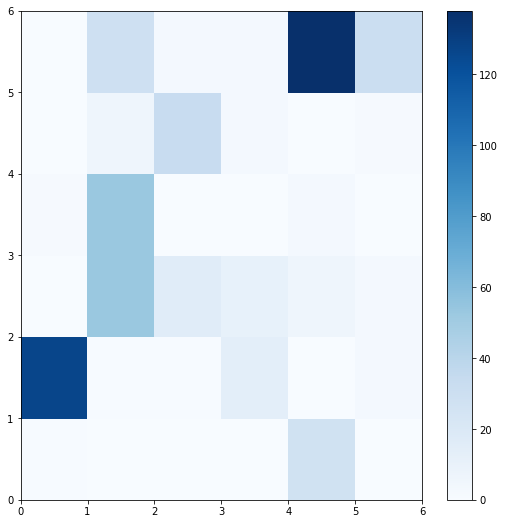

In [119]:
plt.figure(figsize=(9, 9))
frequencies = som.activation_response(X_norm)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.show()

Para tener una idea de qué neuronas del mapa se activan con más frecuencia podemos crear otro diagrama de pseudocolor que refleje las frecuencias de activación.

## Ejemplo 4

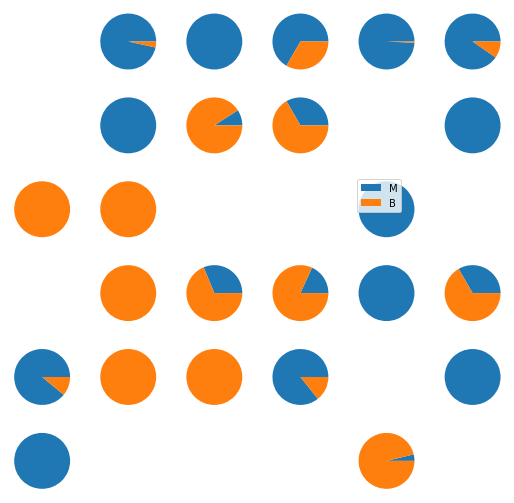

In [129]:
import matplotlib.gridspec as gridspec

labels_map = som.labels_map(X_norm, [label_names[t] for t in y.ravel()])

fig = plt.figure(figsize=(9, 9))
the_grid = gridspec.GridSpec(6, 6, fig)

for position in labels_map.keys():
    label_fracs = [labels_map[position].get(l, 0) for l in label_names]
    plt.subplot(the_grid[6-1-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)
plt.legend(patches, label_names, loc="upper left")

plt.show()